### Applying Classification on Boston Crime Dataset

<pre> We have considered the crime report dataset to perform Classification Model for analyzing the dataset and extract the nature and frequency of crimes in various districts.

<b>Dataset</b>
1. This data set is obtained from Kaggle
- https://www.kaggle.com/AnalyzeBoston/crimes-in-boston
2. The dataset contains 100k unique rows with 15 attributes indicating the crime report filed 
in various districts.
3. The association rule here is performed for the attribute DISTRICT based on the unique
OFFENSE_CODE_GROUP attribute.
4. There are 12 DISTRICT values and 64 OFFENSE_CODE_GROUP values</pre>

### Import Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_crime = pd.read_csv('crime.csv',sep=',')
df_crime.head()
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
# Randomly sample 10% of your dataframe
df_c = df_crime.sample(frac=0.05)
df_c.shape

(21292, 15)

### Filling Missing values

In [4]:
df_c.isna().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT                120
REPORTING_AREA            0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART                  8
STREET                  647
Lat                    1423
Long                   1423
Location                  0
dtype: int64

In [5]:
median = df_c["Lat"].median()
df_c["Lat"].fillna(median, inplace=True) 

median = df_c["Long"].median()
df_c["Long"].fillna(median, inplace=True) 

## Droping Inapropriate attributes

In [6]:
df_c=df_c.dropna()
df_c

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
243762,I172031576,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D4,170,2017,4,Sunday,11,Part Two,E SPRINGFIELD ST,42.335459,-71.074489,"(42.33545950, -71.07448891)"
335019,I162040341,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B2,,2016,5,Monday,18,Part Two,ARION,42.325024,-71.077683,"(0.00000000, 0.00000000)"
100880,I182075189,2646,Liquor Violation,LIQUOR - DRINKING IN PUBLIC,B2,181,2018,9,Monday,20,Part Two,NORFOLK AVE,42.325877,-71.070249,"(42.32587659, -71.07024947)"
414322,I152062097,619,Larceny,LARCENY ALL OTHERS,E5,746,2015,7,Wednesday,10,Part One,LAGRANGE ST,42.292778,-71.169897,"(42.29277797, -71.16989709)"
223906,I172052789,3115,Investigate Person,INVESTIGATE PERSON,C6,936,2017,6,Friday,17,Part Three,FLAHERTY WAY,42.337947,-71.053105,"(42.33794745, -71.05310513)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103537,I182072283,3115,Investigate Person,INVESTIGATE PERSON,A1,123,2018,9,Saturday,4,Part Three,WASHINGTON ST,42.325024,-71.077683,"(0.00000000, 0.00000000)"
392732,I152085559,3106,Property Related Damage,PROPERTY - ACCIDENTAL DAMAGE,B2,264,2015,10,Wednesday,19,Part Three,GAYLAND ST,42.319890,-71.076262,"(42.31989006, -71.07626209)"
330241,I162045422,2647,Other,THREATS TO DO BODILY HARM,E5,687,2016,6,Thursday,6,Part Two,ALDRICH ST,42.284462,-71.141184,"(42.28446188, -71.14118365)"
272350,I172001143,616,Larceny,LARCENY THEFT OF BICYCLE,A1,77,2016,12,Tuesday,19,Part One,CANAL ST,42.364895,-71.060502,"(42.36489527, -71.06050249)"


## Exploratory Data Analysis

In [7]:
df_c['YEAR'].unique()

array([2017, 2016, 2018, 2015, 2019], dtype=int64)

In [8]:
np.isnan(df_c.any())

INCIDENT_NUMBER        False
OFFENSE_CODE           False
OFFENSE_CODE_GROUP     False
OFFENSE_DESCRIPTION    False
DISTRICT               False
REPORTING_AREA         False
YEAR                   False
MONTH                  False
DAY_OF_WEEK            False
HOUR                   False
UCR_PART               False
STREET                 False
Lat                    False
Long                   False
Location               False
dtype: bool

In [9]:
df_c['DISTRICT'].unique()

array(['D4', 'B2', 'E5', 'C6', 'B3', 'C11', 'A1', 'E18', 'E13', 'A7',
       'D14', 'A15'], dtype=object)

## CatPlot Analysis of Crime in Districts based on Year distrubution

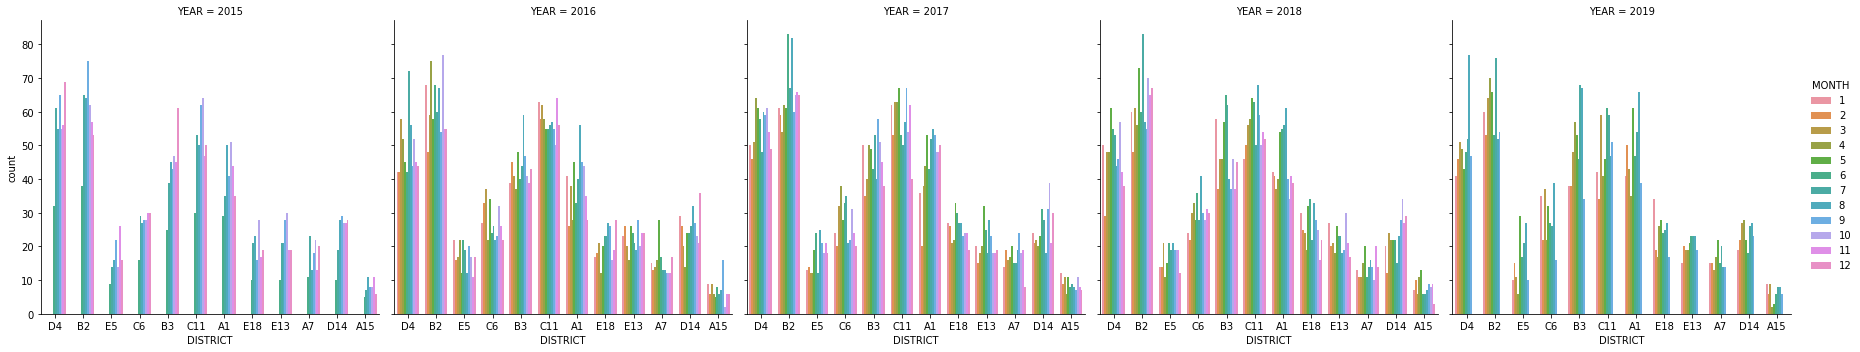

In [10]:
sns.catplot(x="DISTRICT",       # Variable whose distribution (count) is of interest
            hue="MONTH",      # Show distribution, pos or -ve split-wise
            col="YEAR",       # Create two-charts/facets, gender-wise
            data=df_c,
            kind="count")

In [11]:
offense=pd.pivot_table(df_c.loc[:,['OFFENSE_CODE_GROUP','YEAR','OFFENSE_CODE']],index='OFFENSE_CODE_GROUP', 
              columns='YEAR',aggfunc=np.count_nonzero)

In [12]:
summary=pd.DataFrame(offense.apply(np.sum,axis=1))
summary=summary.rename(columns={0:'total'})

### Top 5 high Offences 

In [13]:
sumsort=summary.sort_values(by='total',ascending=False)
top5=sumsort.iloc[0:5,:]
top5

,total
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,2396.0
Larceny,1679.0
Medical Assistance,1579.0
Investigate Person,1227.0
Other,1126.0


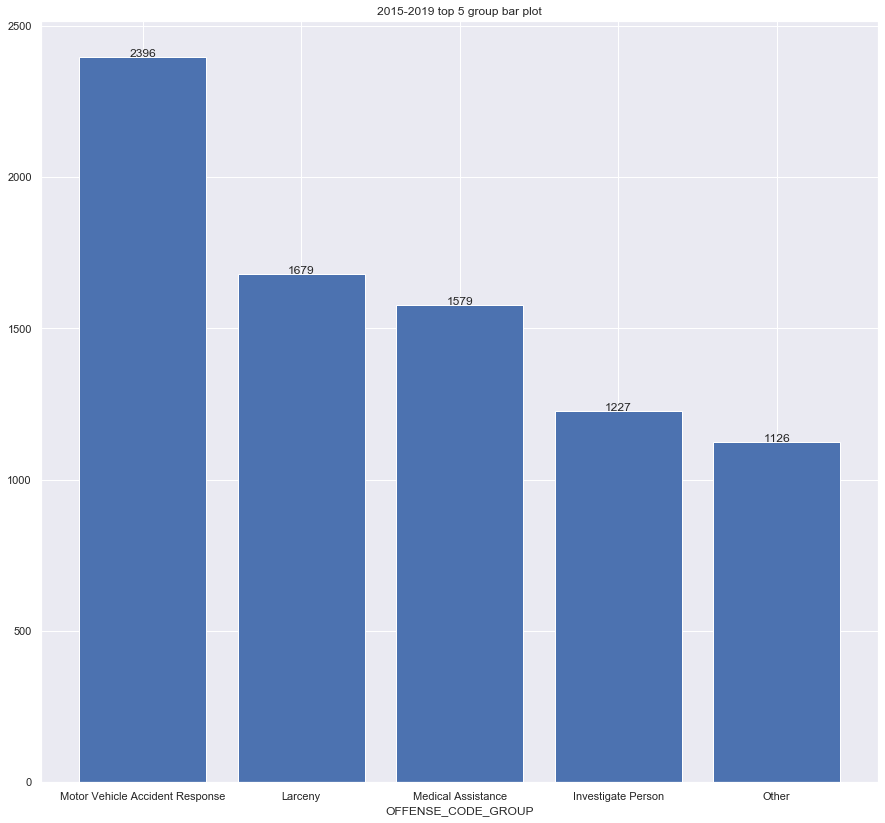

In [14]:
sns.set()
p0=plt.figure(figsize=(15,14))
plt.title(r'2015-2019 top 5 group bar plot')
plt.bar(range(top5.index.shape[0]),top5.loc[:,'total'])
plt.xlabel('OFFENSE_CODE_GROUP')
plt.xticks(range(top5.index.shape[0]),top5.index)
x=np.arange(top5.index.shape[0])
y=np.array(top5['total'])
for i,j in zip(x,y):
    plt.text(i,j,'%d'%j,ha='center')
p0.savefig('./top5_group_bar.png')
plt.show()

## Grouped By District for ease of Analysis

In [15]:
disgroup=df_c.groupby(by='DISTRICT')
groupcount=disgroup.count()
groupcount.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
DISTRICT,,,,,,,,,,,,,,
A1,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260,2260
A15,401,401,401,401,401,401,401,401,401,401,401,401,401,401
A7,820,820,820,820,820,820,820,820,820,820,820,820,820,820
B2,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246,3246
B3,2405,2405,2405,2405,2405,2405,2405,2405,2405,2405,2405,2405,2405,2405


In [16]:
number=groupcount.iloc[:,0]
number=pd.DataFrame(number)

In [17]:
number.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)
number.head()

,NUMBER
DISTRICT,
A1,2260
A15,401
A7,820
B2,3246
B3,2405


### 2015-2018 boston-crime by district bar plot

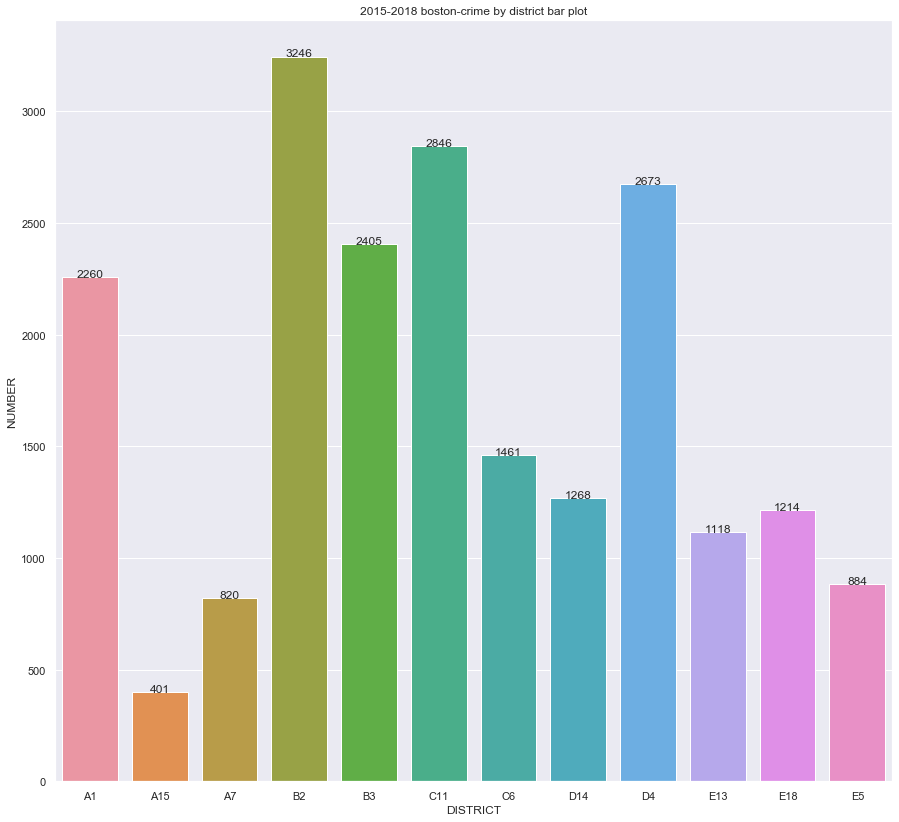

In [18]:
plt.figure(figsize=(15,14))
plt.title(r'2015-2018 boston-crime by district bar plot')
p1=sns.barplot(x=number.index,y='NUMBER',data=number)
x=np.arange(number.index.shape[0])
y=np.array(list(number['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05,'%d'%j,ha='center')
else:
    pass
p1fig=p1.get_figure()
p1fig.savefig('./total_by_district_bar.png')
plt.show()

In [19]:
df_c.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
243762,I172031576,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D4,170,2017,4,Sunday,11,Part Two,E SPRINGFIELD ST,42.335459,-71.074489,"(42.33545950, -71.07448891)"
335019,I162040341,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B2,,2016,5,Monday,18,Part Two,ARION,42.325024,-71.077683,"(0.00000000, 0.00000000)"
100880,I182075189,2646,Liquor Violation,LIQUOR - DRINKING IN PUBLIC,B2,181,2018,9,Monday,20,Part Two,NORFOLK AVE,42.325877,-71.070249,"(42.32587659, -71.07024947)"
414322,I152062097,619,Larceny,LARCENY ALL OTHERS,E5,746,2015,7,Wednesday,10,Part One,LAGRANGE ST,42.292778,-71.169897,"(42.29277797, -71.16989709)"
223906,I172052789,3115,Investigate Person,INVESTIGATE PERSON,C6,936,2017,6,Friday,17,Part Three,FLAHERTY WAY,42.337947,-71.053105,"(42.33794745, -71.05310513)"


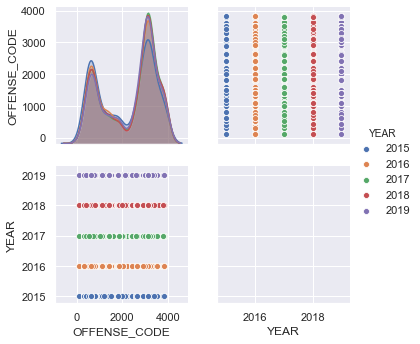

In [20]:
sns.set()
sns.pairplot(df_c[['OFFENSE_CODE_GROUP', 'OFFENSE_CODE','REPORTING_AREA' ,'DISTRICT','YEAR']],
             hue='YEAR', diag_kind="kde")

## Pre-processing

In [21]:
pd.crosstab([df_c['OFFENSE_CODE_GROUP'],df_c['DISTRICT']],df_c['YEAR'])

YEAR                         2015  2016  2017  2018  2019
OFFENSE_CODE_GROUP DISTRICT                              
Aggravated Assault A1           5     7    12    21    13
                   A15          1     1     3     0     0
                   A7           7     1     3     3     3
                   B2          20    24    32    27    18
                   B3          13    13    19    14    11
...                           ...   ...   ...   ...   ...
Warrant Arrests    D14          2     4     5     7     3
                   D4           5    20    29    18    11
                   E13          6     7    11     9     2
                   E18          1     8     6     4     2
                   E5           2     1     3     1     2

[605 rows x 5 columns]

In [22]:
df_c=df_c.drop(['OFFENSE_DESCRIPTION','UCR_PART','STREET','INCIDENT_NUMBER','Location','DAY_OF_WEEK','REPORTING_AREA'],axis=1)

### One-Hot Encoding

In [23]:
one_hot = pd.get_dummies(df_c['DISTRICT'])
df_c = df_c.drop('DISTRICT', axis=1)
df_c = df_c.join(one_hot)

one_hot = pd.get_dummies(df_c['OFFENSE_CODE_GROUP'])
df_c = df_c.drop('OFFENSE_CODE_GROUP', axis=1)
df_c = df_c.join(one_hot)

In [24]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20596 entries, 243762 to 43264
Data columns (total 76 columns):
OFFENSE_CODE                        20596 non-null int64
YEAR                                20596 non-null int64
MONTH                               20596 non-null int64
HOUR                                20596 non-null int64
Lat                                 20596 non-null float64
Long                                20596 non-null float64
A1                                  20596 non-null uint8
A15                                 20596 non-null uint8
A7                                  20596 non-null uint8
B2                                  20596 non-null uint8
B3                                  20596 non-null uint8
C11                                 20596 non-null uint8
C6                                  20596 non-null uint8
D14                                 20596 non-null uint8
D4                                  20596 non-null uint8
E13                        

## Train&Test Split

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_c, test_size=0.3, random_state=42)
print(train_set.shape,test_set.shape)

(14417, 76) (6179, 76)


In [26]:
target = 'YEAR'
features = list(train_set.columns)
features = [f for f in features if f!=target]

In [27]:
X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]

In [28]:
print(X_tr.shape,y_tr.shape)
print(X_te.shape,y_te.shape)

(14417, 75) (14417, 1)
(6179, 75) (6179, 1)


In [29]:
y_tr_b = 1*np.ravel(y_tr>=2017)
y_te_b = 1*np.ravel(y_te>=2017)

In [30]:
print(y_tr_b)


[0 1 1 ... 0 0 1]


## DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV


clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X_tr, y_tr_b)

In [32]:
y_pred=clf.predict(X_tr)
y_pred


array([1, 1, 1, ..., 1, 1, 1])

### Accuracy Score for Testdata and Traindata

In [33]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_tr)
accuracy_score(y_tr_b, y_pred)

0.6468752167579941

In [34]:
clf = clf.fit(X_te, y_te_b)

In [35]:
from sklearn.metrics import accuracy_score

y_pred_t = clf.predict(X_te)
accuracy_score(y_te_b, y_pred_t)

0.6552840265415115

### Confusion Matrix and precision,recall,f1-score for TestData   

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
print(confusion_matrix(y_te_b, y_pred_t))
print(classification_report(y_te_b, y_pred_t))

[[  34 2120]
 [  10 4015]]
              precision    recall  f1-score   support

           0       0.77      0.02      0.03      2154
           1       0.65      1.00      0.79      4025

    accuracy                           0.66      6179
   macro avg       0.71      0.51      0.41      6179
weighted avg       0.70      0.66      0.53      6179



## Logistic Regression

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 0 1 1]


Text(0, 0.5, 'Accuracy')

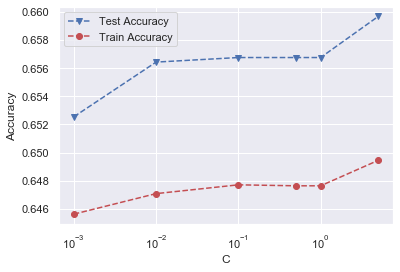

In [38]:
from sklearn.linear_model import LogisticRegression


C = [ 0.001, 0.01, 0.1, 0.5, 1.0,  5]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X_tr,y_tr_b)
    log_reg_pred_train = clf.predict(X_tr)
    log_reg_pred = clf.predict(X_te)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_te_b, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y_tr_b,log_reg_pred_train))
    
    

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

## Naive Bayes Classifier

In [39]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X_tr,y_tr_b)
NB_pred = clf_NB.predict(X_te)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_te_b, NB_pred)))

[0 0 1 ... 0 1 1]
Accuracy on test data is 0.63


## Support Vector Machine (SVM) Classifier

[1 1 1 ... 0 1 1]
[1 1 1 ... 0 1 1]
[1 1 1 ... 0 1 1]
[1 1 1 ... 0 1 1]
[1 1 1 ... 0 1 1]
[1 1 1 ... 0 1 1]


Text(0, 0.5, 'Accuracy')

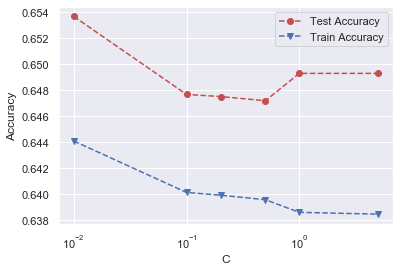

In [40]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 1, 5]

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(X_tr,y_tr_b)
    svml_pred = clf.predict(X_te)
    svml_pred_train = clf.predict(X_tr)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_te_b, svml_pred))
    SVMLtrainAcc.append(accuracy_score(y_tr_b,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

## Non Linear Decision Boundary

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 0 1 1]
[1 1 1 ... 0 1 1]
[1 1 1 ... 0 1 1]


Text(0, 0.5, 'Accuracy')

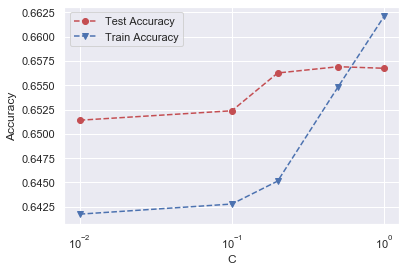

In [41]:
C = [0.01, 0.1, 0.2, 0.5, 1]
 

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_tr,y_tr_b)
    svml_pred = clf.predict(X_te)
    svml_pred_train = clf.predict(X_tr)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_te_b, svml_pred))
    SVMLtrainAcc.append(accuracy_score(y_tr_b,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

## K Nearest Neighbor (KNN) Classifier

[1 1 0 ... 1 0 1]
[1 0 1 ... 1 1 1]
[1 1 1 ... 0 1 1]


Text(0, 0.5, 'Accuracy')

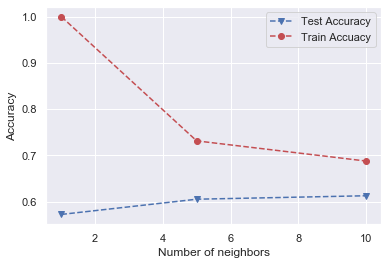

In [42]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_tr, y_tr_b)
    knn_pred = clf.predict(X_te)
    knn_pred_train = clf.predict(X_tr)
    print(knn_pred)
    testAcc.append(accuracy_score(y_te_b, knn_pred))
    trainAcc.append(accuracy_score(y_tr_b,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

## Artificial Neural Network

In [124]:
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing

In [144]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [145]:
data_df = pd.read_csv('crime.csv',header='infer')
Classes = encode_text_index(data_df,'YEAR')

In [146]:
data_df= data_df.sample(frac=0.05)
data_df.shape

(21292, 15)

In [147]:
data_df = data_df.drop(['OFFENSE_DESCRIPTION','UCR_PART','STREET','INCIDENT_NUMBER','Location','DAY_OF_WEEK','REPORTING_AREA'],axis=1)


In [148]:
data_df

,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,HOUR,Lat,Long
64773,3125,Warrant Arrests,B2,4,2,9,42.309957,-71.084308
373888,802,Simple Assault,C11,0,12,15,42.298820,-71.065701
335634,3301,Verbal Disputes,E5,1,5,13,42.278319,-71.133046
84579,1102,Fraud,D14,3,11,13,42.349330,-71.153394
67244,735,Auto Theft Recovery,B3,4,1,13,42.291063,-71.074872
...,...,...,...,...,...,...,...,...
171657,3410,Towed,E13,3,1,1,42.319157,-71.100676
3652,3115,Investigate Person,A15,4,9,16,42.378369,-71.058719
121507,3115,Investigate Person,B2,3,7,8,42.308789,-71.090556
65915,617,Larceny,C11,4,1,16,42.311920,-71.069130


In [149]:
median = data_df["Lat"].median()
data_df["Lat"].fillna(median, inplace=True) 

median = data_df["Long"].median()
data_df["Long"].fillna(median, inplace=True) 

In [150]:
data_df=data_df.dropna()
data_df

,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,HOUR,Lat,Long
64773,3125,Warrant Arrests,B2,4,2,9,42.309957,-71.084308
373888,802,Simple Assault,C11,0,12,15,42.298820,-71.065701
335634,3301,Verbal Disputes,E5,1,5,13,42.278319,-71.133046
84579,1102,Fraud,D14,3,11,13,42.349330,-71.153394
67244,735,Auto Theft Recovery,B3,4,1,13,42.291063,-71.074872
...,...,...,...,...,...,...,...,...
171657,3410,Towed,E13,3,1,1,42.319157,-71.100676
3652,3115,Investigate Person,A15,4,9,16,42.378369,-71.058719
121507,3115,Investigate Person,B2,3,7,8,42.308789,-71.090556
65915,617,Larceny,C11,4,1,16,42.311920,-71.069130


In [151]:
one_hot = pd.get_dummies(data_df['DISTRICT'])
data_df = data_df.drop('DISTRICT', axis=1)
data_df = data_df.join(one_hot)

In [152]:
one_hot = pd.get_dummies(data_df['OFFENSE_CODE_GROUP'])
data_df = data_df.drop('OFFENSE_CODE_GROUP', axis=1)
data_df = data_df.join(one_hot)

In [153]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21176 entries, 64773 to 247071
Data columns (total 79 columns):
OFFENSE_CODE                        21176 non-null int64
YEAR                                21176 non-null int64
MONTH                               21176 non-null int64
HOUR                                21176 non-null int64
Lat                                 21176 non-null float64
Long                                21176 non-null float64
A1                                  21176 non-null uint8
A15                                 21176 non-null uint8
A7                                  21176 non-null uint8
B2                                  21176 non-null uint8
B3                                  21176 non-null uint8
C11                                 21176 non-null uint8
C6                                  21176 non-null uint8
D14                                 21176 non-null uint8
D4                                  21176 non-null uint8
E13                        

In [154]:

Classes

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

In [155]:
X,Y = to_xy(data_df,'YEAR')
testX, testY = to_xy(data_df,'YEAR')

In [156]:
print(X.shape)
print(Y.shape)
Y

(21176, 78)
(21176, 5)


array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [157]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1]))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [158]:
model.fit(X, Y, epochs=10)

Epoch 1/10
21176/21176 [==============================] - 2s 82us/step - loss: 12.9368 - accuracy: 0.2145
Epoch 2/10
21176/21176 [==============================] - 1s 65us/step - loss: 9.1419 - accuracy: 0.2150
Epoch 3/10
21176/21176 [==============================] - 1s 64us/step - loss: 8.4917 - accuracy: 0.2155
Epoch 4/10
21176/21176 [==============================] - 1s 65us/step - loss: 7.9123 - accuracy: 0.2139
Epoch 5/10
21176/21176 [==============================] - 1s 65us/step - loss: 7.4841 - accuracy: 0.2143
Epoch 6/10
21176/21176 [==============================] - 1s 65us/step - loss: 7.2473 - accuracy: 0.2181
Epoch 7/10
21176/21176 [==============================] - 1s 66us/step - loss: 6.8905 - accuracy: 0.2216
Epoch 8/10
21176/21176 [==============================] - 1s 67us/step - loss: 6.6851 - accuracy: 0.2200
Epoch 9/10
21176/21176 [==============================] - 1s 67us/step - loss: 6.6469 - accuracy: 0.2245
Epoch 10/10
21176/21176 [=============================

In [159]:
pred = model.predict(testX)
print(pred)

[[2.01662168e-01 7.27218036e-13 6.38390920e-05 7.98271179e-01
  2.91235892e-06]
 [8.11933577e-01 3.33740172e-05 4.04733000e-03 1.83224082e-01
  7.61608826e-04]
 [4.06002134e-01 4.72704524e-14 1.33642088e-05 5.93983531e-01
  9.02809006e-07]
 ...
 [6.27146482e-01 1.01834584e-13 8.78166338e-06 3.72844130e-01
  6.06566175e-07]
 [3.26811559e-02 1.50158629e-03 2.39023060e-01 6.13373101e-01
  1.13421075e-01]
 [2.17999309e-01 5.13095188e-14 1.45114436e-05 7.81985164e-01
  1.01836599e-06]]


In [160]:
pred = np.argmax(pred, axis=1)


In [161]:
true = np.argmax(testY, axis=1)

In [162]:
Classes[pred]

array([2018, 2015, 2018, ..., 2015, 2018, 2018], dtype=int64)

In [163]:
Classes[true]

array([2019, 2015, 2016, ..., 2018, 2019, 2017], dtype=int64)

In [164]:
print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 0.22


In [165]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       0.20      0.89      0.33      2692
           1       0.00      0.00      0.00      4819
           2       0.00      0.00      0.00      5073
           3       0.24      0.46      0.32      4915
           4       0.00      0.00      0.00      3677

    accuracy                           0.22     21176
   macro avg       0.09      0.27      0.13     21176
weighted avg       0.08      0.22      0.12     21176

